In [3]:
from matplotlib import pyplot as plt
from numba import typed

from pyloki.config import PulsarSearchConfig
from pyloki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig
from pyloki.utils import np_utils


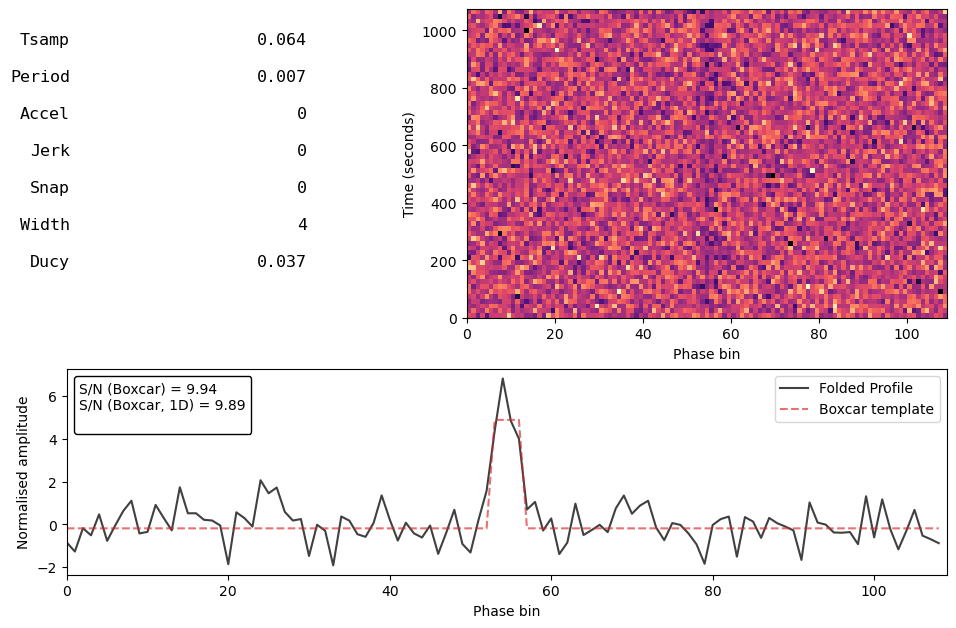

In [4]:
pulsar_period = 0.007  # (s)
dt = 64e-6
nsamps = 2**24

cfg = PulseSignalConfig(period=pulsar_period, dt=dt, snr=10, ducy=0.05, nsamps=nsamps,
                        os=1)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins)
plt.show()

In [5]:
tol_bins = 2 #cfg.tol_bins
fold_bins = 64#cfg.fold_bins
param_limits = typed.List([(1 / 0.0075, 1 / 0.0065)])
bseg_brute = cfg.nsamps // 2048
search_cfg = PulsarSearchConfig(cfg.nsamps, cfg.dt, fold_bins, tol_bins, param_limits,
                                bseg_brute=bseg_brute)
dyp, pgram = ffa_search(tim_data, search_cfg)

2025-02-16 22:13:44 INFO     - pyloki.ffa - Initializing data structure...

2025-02-16 22:13:45 INFO     - pyloki.ffa - param steps: [0.05960464]

2025-02-16 22:13:53 INFO     - pyloki.ffa - fold dimensions: (2048, 344, 2, 64)

2025-02-16 22:13:54 INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 9.411 seconds

                    INFO     - pyloki.ffa - param steps: [0.02980232]

2025-02-16 22:14:01 INFO     - pyloki.ffa - i_iter: 1, fold dims: (1024, 688, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.01490116]

                    INFO     - pyloki.ffa - i_iter: 2, fold dims: (512, 1376, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00745058]

                    INFO     - pyloki.ffa - i_iter: 3, fold dims: (256, 2753, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00372529]

2025-02-16 22:14:02 INFO     - pyloki.ffa - i_iter: 4, fold dims: (128, 5506, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00186265]

                    INFO     - pyloki.ffa - i_iter: 5, fold dims: (64, 11012, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00093132]

2025-02-16 22:14:03 INFO     - pyloki.ffa - i_iter: 6, fold dims: (32, 22025, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00046566]

                    INFO     - pyloki.ffa - i_iter: 7, fold dims: (16, 44050, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00023283]

                    INFO     - pyloki.ffa - i_iter: 8, fold dims: (8, 88101, 2, 64)

                    INFO     - pyloki.ffa - param steps: [0.00011642]

2025-02-16 22:14:04 INFO     - pyloki.ffa - i_iter: 9, fold dims: (4, 176203, 2, 64)

                    INFO     - pyloki.ffa - param steps: [5.82076609e-05]

                    INFO     - pyloki.ffa - i_iter: 10, fold dims: (2, 352407, 2, 64)

                    INFO     - pyloki.ffa - param steps: [2.91038305e-05]

2025-02-16 22:14:05 INFO     - pyloki.ffa - i_iter: 11, fold dims: (1, 704815, 2, 64)

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 10.992 seconds

In [6]:
idx_freq = np_utils.find_nearest_sorted_idx(dyp.param_arr[-1], cfg.freq)
true_params_idx = idx_freq
print(f"True param indices: {true_params_idx}")
print(f"Best param indices: {pgram.find_best_indices()}")
print(pgram.get_summary())

True param indices: 327235
Best param indices: (np.int64(327235), np.int64(1))
Best S/N: 8.09
Best Period: 0.007
Best freq: 142.85714285714286
Best width: 2


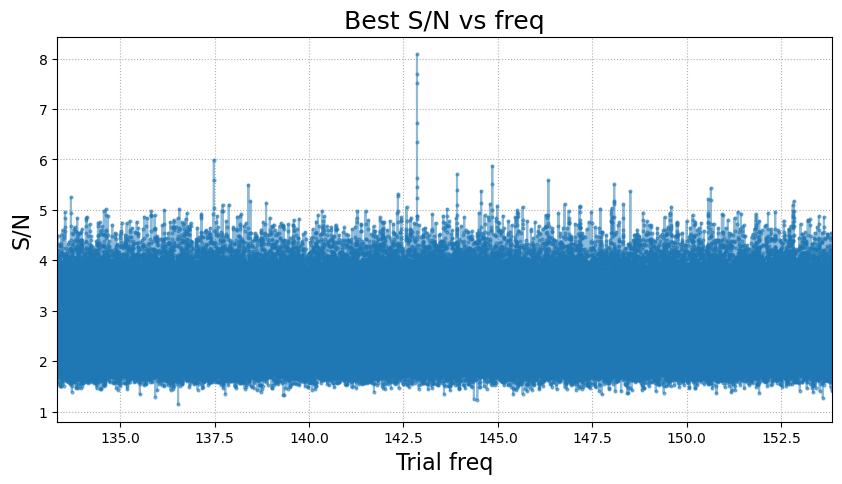

In [7]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()